<a href="https://colab.research.google.com/github/gtimokhina/homework_1_directory/blob/master/FastAI_image_classification_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Import fastai libraries

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Use untar_data function to load and extract data. Check *help(untar_data)* for more info

In [25]:
path = untar_data(URLs.CIFAR); path

PosixPath('/root/.fastai/data/cifar10')

## Check how data is located in folders

In [26]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

## Store locations on data in variables


In [0]:
path_test = path/'test'
path_train = path/'train'

In [28]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/bird')]

## Create an object ImageDataBunch. It represents all of the data we need to build a model 

In [32]:
help(ImageDataBunch)

Help on class ImageDataBunch in module fastai.vision.data:

class ImageDataBunch(fastai.basic_data.DataBunch)
 |  DataBunch suitable for computer vision.
 |  
 |  Method resolution order:
 |      ImageDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  batch_stats(self, funcs:Collection[Callable]=None, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>) -> torch.Tensor
 |      Grab a batch of data and call reduction function `func` per channel
 |  
 |  normalize(self, stats:Collection[torch.Tensor]=None, do_x:bool=True, do_y:bool=False) -> None
 |      Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  create_from_ll(lls:fastai.data_block.LabelLists, bs:int=64, val_bs:int=None, ds_tfms:Union[Callable, Collection[Callable], NoneType]=None, num_workers:int=2, dl_tfms:Union[Coll

In [0]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0).normalize(imagenet_stats)


## Check the data

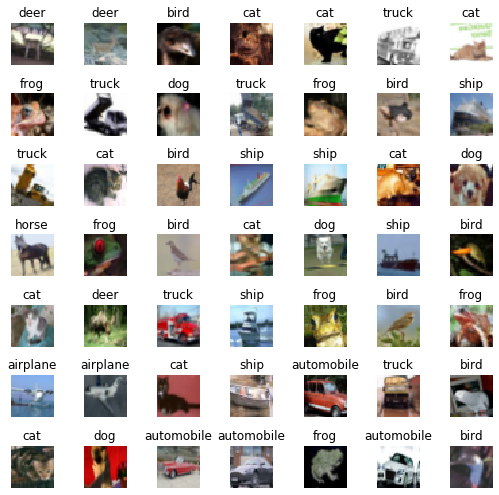

In [37]:
data.show_batch(rows=7, figsize=(7,7))

## Check our classes

In [39]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

## Train our model. Try resnet34

In [40]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


## Train for 4 epochs (4 cycles through all our data).

In [41]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.693228,1.495780,0.530900,01:57
1,1.337149,1.148055,0.401600,01:56
2,1.160732,1.017171,0.362400,01:56
3,1.117145,1.007487,0.354900,01:55


## do 4 more cycles to improve score

In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.131621,0.989680,0.352700,01:54
1,1.056046,0.916123,0.322500,01:53
2,0.974720,0.845235,0.295500,01:53
3,0.954933,0.853425,0.297700,01:50


## save model

In [0]:
learn.save('stage-1')

## Check Results

###   check where the model was confused

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

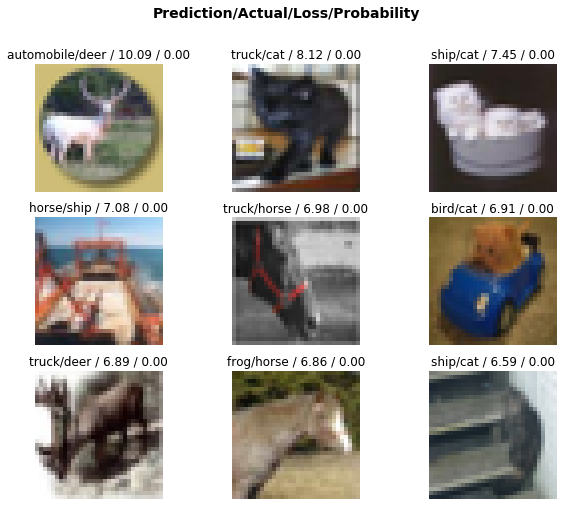

In [47]:
interp.plot_top_losses(9, figsize=(10,8))

###  confusion matrix

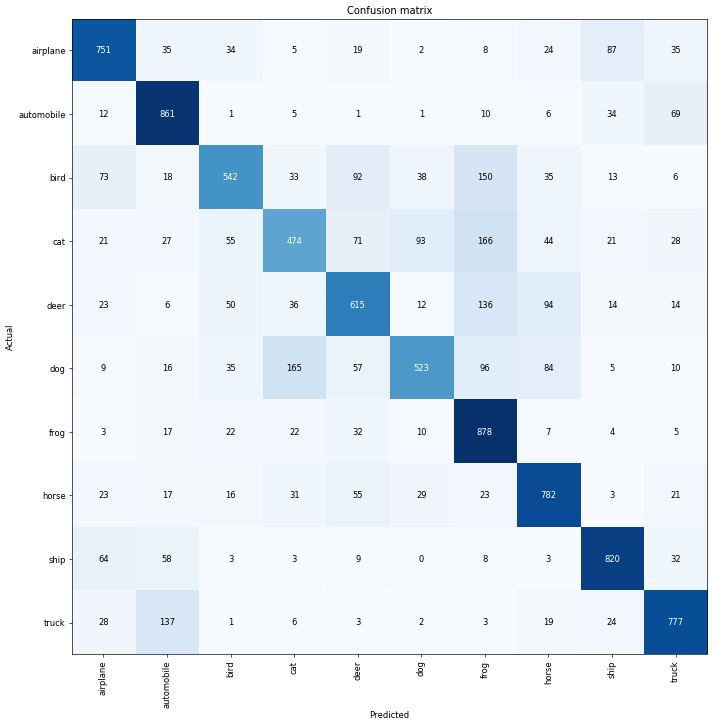

In [48]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

###  most confused

In [49]:
interp.most_confused(min_val=2)

[('cat', 'frog', 166),
 ('dog', 'cat', 165),
 ('bird', 'frog', 150),
 ('truck', 'automobile', 137),
 ('deer', 'frog', 136),
 ('dog', 'frog', 96),
 ('deer', 'horse', 94),
 ('cat', 'dog', 93),
 ('bird', 'deer', 92),
 ('airplane', 'ship', 87),
 ('dog', 'horse', 84),
 ('bird', 'airplane', 73),
 ('cat', 'deer', 71),
 ('automobile', 'truck', 69),
 ('ship', 'airplane', 64),
 ('ship', 'automobile', 58),
 ('dog', 'deer', 57),
 ('cat', 'bird', 55),
 ('horse', 'deer', 55),
 ('deer', 'bird', 50),
 ('cat', 'horse', 44),
 ('bird', 'dog', 38),
 ('deer', 'cat', 36),
 ('airplane', 'automobile', 35),
 ('airplane', 'truck', 35),
 ('bird', 'horse', 35),
 ('dog', 'bird', 35),
 ('airplane', 'bird', 34),
 ('automobile', 'ship', 34),
 ('bird', 'cat', 33),
 ('frog', 'deer', 32),
 ('ship', 'truck', 32),
 ('horse', 'cat', 31),
 ('horse', 'dog', 29),
 ('cat', 'truck', 28),
 ('truck', 'airplane', 28),
 ('cat', 'automobile', 27),
 ('airplane', 'horse', 24),
 ('truck', 'ship', 24),
 ('deer', 'airplane', 23),
 ('hors

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [51]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.660079,0.562835,0.196800,02:00


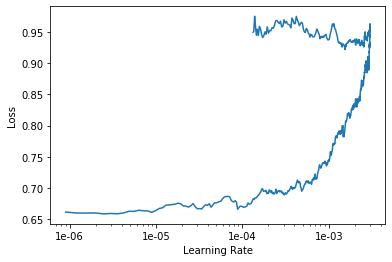

In [52]:
learn.recorder.plot()

In [53]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.584306,0.541278,0.190100,02:02
1,0.557657,0.534194,0.186600,02:01


# Training with resnet50

In [0]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0).normalize(imagenet_stats)


In [55]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


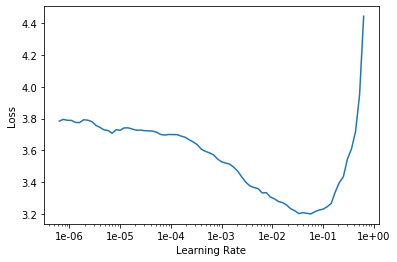

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.823898,1.524717,0.520700,02:04
1,1.390973,1.196763,0.421500,02:04
2,1.117869,1.048093,0.346700,02:06
3,0.974022,0.836898,0.293800,02:07
4,0.875731,0.773178,0.268900,02:05
5,0.819208,0.724030,0.256500,02:04
6,0.812247,0.713886,0.253300,02:04
7,0.774322,0.719134,0.254400,02:00


In [0]:
learn.save('stage-1-50')

In [59]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.758788,0.678479,0.234400,02:04
1,0.708020,0.631650,0.219900,02:05
2,0.689025,0.620481,0.218600,02:03


In [60]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.666848,0.604725,0.213700,02:07
1,0.620586,0.583457,0.202900,02:10
2,0.612064,0.566348,0.199400,02:08


In [61]:
interp = ClassificationInterpretation.from_learner(learn)

In [62]:
interp.most_confused(min_val=2)

[('dog', 'cat', 155),
 ('cat', 'dog', 120),
 ('cat', 'frog', 90),
 ('deer', 'frog', 76),
 ('bird', 'frog', 75),
 ('automobile', 'truck', 69),
 ('deer', 'horse', 69),
 ('bird', 'deer', 68),
 ('deer', 'bird', 57),
 ('truck', 'automobile', 57),
 ('bird', 'airplane', 51),
 ('ship', 'airplane', 51),
 ('dog', 'horse', 45),
 ('cat', 'bird', 44),
 ('ship', 'truck', 43),
 ('airplane', 'ship', 42),
 ('cat', 'deer', 42),
 ('airplane', 'truck', 40),
 ('cat', 'horse', 37),
 ('dog', 'frog', 37),
 ('horse', 'dog', 36),
 ('deer', 'cat', 35),
 ('dog', 'deer', 34),
 ('horse', 'deer', 31),
 ('bird', 'cat', 30),
 ('bird', 'dog', 30),
 ('ship', 'automobile', 29),
 ('airplane', 'automobile', 23),
 ('cat', 'truck', 23),
 ('frog', 'bird', 23),
 ('airplane', 'bird', 22),
 ('horse', 'cat', 22),
 ('dog', 'bird', 21),
 ('frog', 'cat', 21),
 ('bird', 'horse', 20),
 ('cat', 'automobile', 19),
 ('deer', 'dog', 18),
 ('deer', 'airplane', 14),
 ('horse', 'frog', 14),
 ('airplane', 'deer', 13),
 ('cat', 'ship', 13),
 (